# SKANDER HADDAR

In [ ]:
import numpy as np 
from skimage import data
import skimage as sk
import matplotlib.pyplot as plt
import scipy

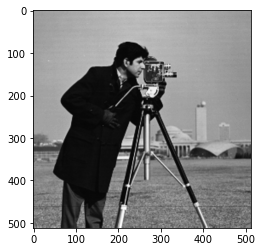

In [14]:
img=data.camera()
plt.imshow(img , cmap='gray')
plt.show() 

# filtrage_passe_bas

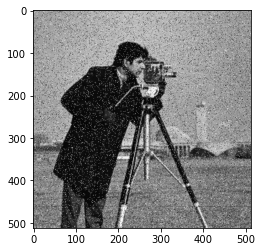

In [15]:
noised_img = sk.util.random_noise(img , mode= "s&p" , amount=0.1)
plt.imshow(noised_img , cmap='gray')
plt.show() 

on crée ce bruit avec un filtre passe bas 

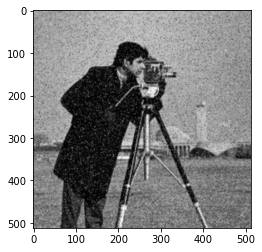

In [30]:
weights3 = np.ones((3,3))/9
weights5 = np.ones((5,5))/25
weights7 = np.ones((7,7))/49
weights11 = np.ones((11,11))/121

from scipy import ndimage
convolved_img3= ndimage.convolve(noised_img ,weights3)
convolved_img5= ndimage.convolve(noised_img ,weights5)
convolved_img7= ndimage.convolve(noised_img ,weights7)
convolved_img11= ndimage.convolve(noised_img ,weights11)


plt.imshow(convolved_img3 , cmap='gray')
plt.show() 

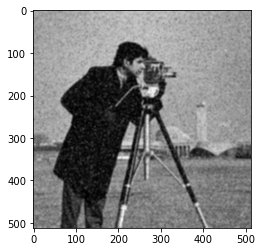

In [31]:
plt.imshow(convolved_img5 , cmap='gray')
plt.show()

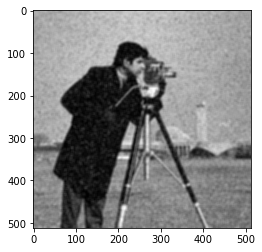

In [32]:
plt.imshow(convolved_img7 , cmap='gray')
plt.show()

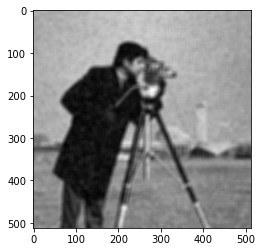

In [33]:
plt.imshow(convolved_img11 , cmap='gray')
plt.show()

à chaque fois on agrandit la taille du matrice filtre, l'image de convolution sera plus ambiguit 

# filtrage_median

In [34]:
 from scipy import ndimage

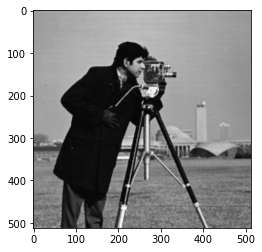

In [55]:
plt.imshow(ndimage.median_filter(noised_img , (3,3)), cmap="gray")
plt.show()

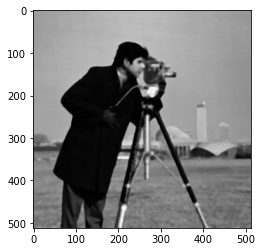

In [56]:
plt.imshow(ndimage.median_filter(noised_img , (7,7)), cmap="gray")
plt.show()

la reduction de noise de l'image avec le filtre median avec un taille de (7x7) est plus important qu'avec un filtre de taille(3x3)

le filtre median donne une resultat plus claire que la resultat donné par le filtre moyenneur

# filtrage gaussian

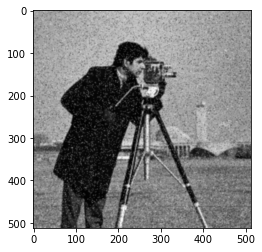

In [57]:
plt.imshow(ndimage.gaussian_filter(noised_img, 1), cmap="gray")

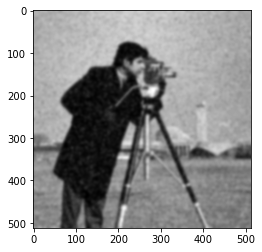

In [58]:
plt.imshow(ndimage.gaussian_filter(noised_img, 3), cmap="gray")

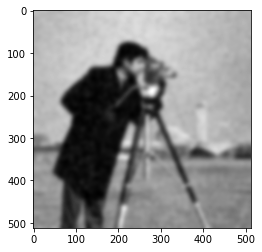

In [60]:
plt.imshow(ndimage.gaussian_filter(noised_img, 5), cmap="gray")
plt.show()

le filtre gaussian est un filtre qui augmente la noise, si on augmente le parametre sigma, la noise augmente

# filtrage passe-haut

In [71]:
fph=np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]))/9

In [72]:
iph= ndimage.convolve(img ,fph)


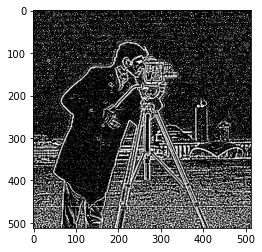

In [74]:
plt.imshow(iph, cmap='gray')
plt.show()

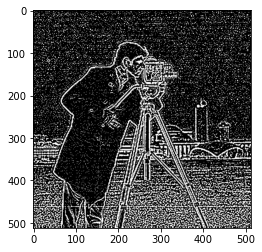

In [77]:
ipb= ndimage.convolve(img ,weights3)
plt.imshow(img-ipb, cmap='gray')
plt.show()

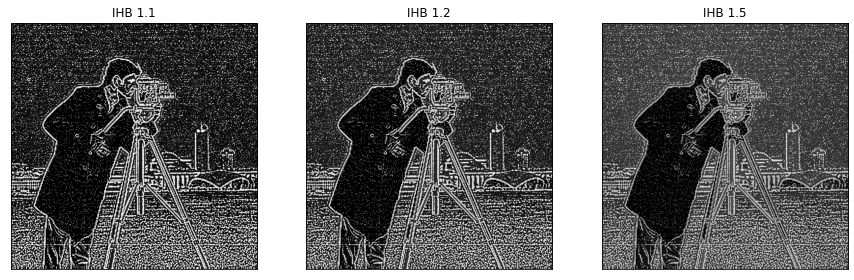

In [80]:
IHB1, IHB2, IHB5= 0.1*img +iph , 0.2*img+iph , 0.5*img+iph

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [IHB1, IHB2, IHB5],
        ['IHB 1.1', 'IHB 1.2', 'IHB 1.5']
):
    ax.imshow(img,cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

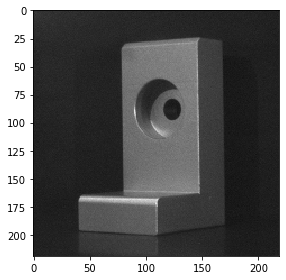

In [85]:
from skimage import io
L=io.imread(r"C:\Users\USER\Desktop\tous les tp\tp traitement d'image\TP3\L.png")
io.imshow(L)
plt.show()

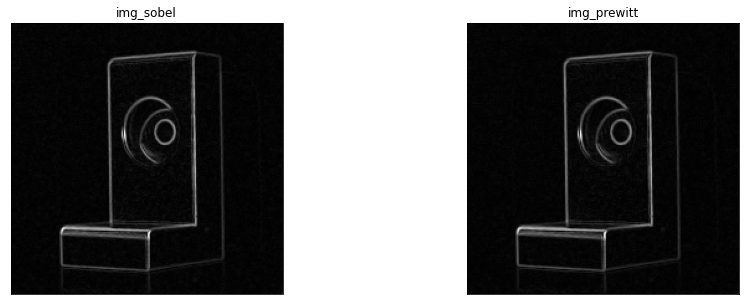

In [86]:
from skimage.filters import sobel,prewitt
img_sobel=sobel(L)
img_prewitt=prewitt(L)
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [img_sobel,img_prewitt],
        ['img_sobel','img_prewitt']
):
    ax.imshow(img,cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

seuillage de sobel


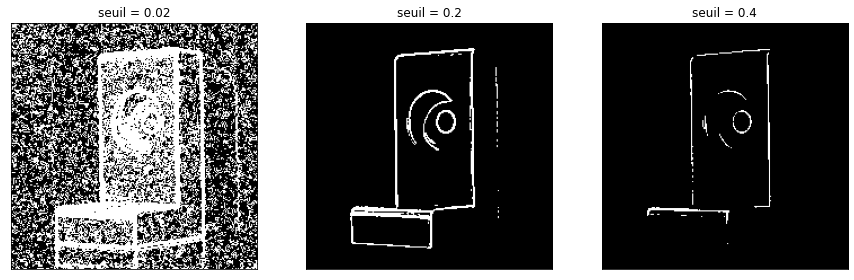

In [87]:
z02=img_sobel>0.02*img_sobel.max()
z2=img_sobel>0.2*img_sobel.max()
z4=img_sobel>0.4*img_sobel.max()
print("seuillage de sobel")
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [z02, z2,z4],
        ['seuil = 0.02', 'seuil = 0.2','seuil = 0.4']
):
    ax.imshow(img,cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

seuillage de prewitt


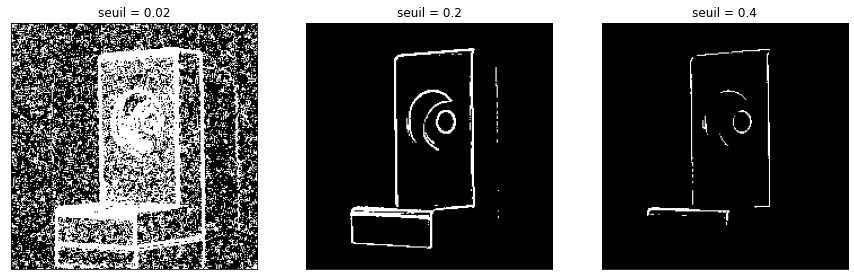

In [89]:
z02=img_prewitt>0.02*img_sobel.max()
z2=img_prewitt>0.2*img_sobel.max()
z4=img_prewitt>0.4*img_sobel.max()
print("seuillage de prewitt")
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [z02, z2,z4],
        ['seuil = 0.02', 'seuil = 0.2','seuil = 0.4']
):
    ax.imshow(img,cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

le seuil optimal est 0.2

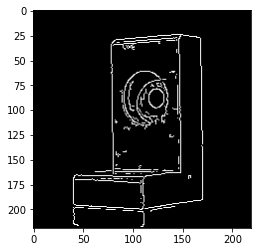

In [97]:
from skimage.feature import canny
img_canny=canny(L , 0.1)
plt.imshow(img_canny, cmap='gray')

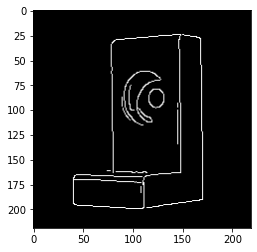

In [98]:
img_canny=canny(L , 1)
plt.imshow(img_canny, cmap='gray')

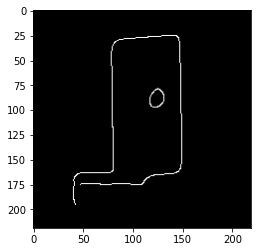

In [99]:
img_canny=canny(L ,5)
plt.imshow(img_canny, cmap='gray')

le filtre canny donne la meilleur resultat de detection de contours avec le meilleur sigma 1